# Librerias

In [1]:
#importar solo una parte from pandas import DataFrame as df
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pyodbc
#comando que esta coriende que lo que se plotee se dibuje en el resultado, el % es para hacer llamadas externas a la sintaxis de python
## ejemplo % pip install para intalar una libreria de python, se les conoce como magic funtions
%matplotlib inline

# a

In [2]:
conexion = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-34T1EIQ;'
'Database=Admisiones_DWH;'
'Trusted_Connection=yes;', timeout=5000)

In [23]:
df=pd.read_sql("select e.*, c.NombreFacultad, CA.Genero, C.NombreCarrera, F.Year from Fact.Examen E inner join Dimension.Carrera C on (E.sk_Carrera=C.sk_Carrera) inner join Dimension.Candidato CA on (E.sk_candidato=CA.sk_Candidato) inner join Dimension.Fecha F on (E.DateKey=F.DateKey)", conexion)

# b

## 1


In [5]:
df.groupby("NombreFacultad").count()["ID_Examen"].reset_index(name="ConteoExamenes")

,NombreFacultad,ConteoExamenes
0,Arquitectura,9310
1,Ciencias Agricolas,3104
2,Ciencias Economicas,9266
3,Ciencias Politicas,9290
4,Ingeniería,9248
5,Medicina,9278


## 2

In [8]:
df.groupby("Genero").count()["ID_Examen"].reset_index(name="ConteoExamenes")

,Genero,ConteoExamenes
0,F,24555
1,M,24941


## 3

In [10]:
df.groupby("NombreCarrera").sum()["Precio"].reset_index(name="Ingresos")

,NombreCarrera,Ingresos
0,Admin de Empresas,1460764.10
1,Agronomia,1472798.49
2,Arquitecrtura,1472209.41
3,Ciencias sociales,1470349.57
4,Contador Publico y Auditor,1469065.60
5,Derecho internacional,1476007.22
6,Diseño Industrial,1472469.94
7,Diseño grafico,1476152.33
8,Enfermeria,1474101.49
9,Hoteleria,1471569.39


## 4

In [15]:
dfPromedio=df.groupby("NombreFacultad").mean()["NotaTotal"].reset_index(name="Promedio").head(3)
dfPromedio

,NombreFacultad,Promedio
0,Arquitectura,74.974290
1,Ciencias Agricolas,74.608157
2,Ciencias Economicas,74.872658


# C

## 1

([<matplotlib.patches.Wedge at 0x1f1c15d4e10>,
 [Text(0.913470699505598, 0.6128387072833714, 'Arquitectura'),
  Text(0.2098381458110263, 1.0797999595122194, 'Ciencias Agricolas'),
  Text(-0.6149243505668454, 0.9120680035391788, 'Ciencias Economicas'),
  Text(-1.0780317930018875, -0.21874060728894396, 'Ciencias Politicas'),
  Text(-0.21203085933070062, -1.0793715369100136, 'Ingeniería'),
  Text(0.914713517691085, -0.6109821442179806, 'Medicina')],
 [Text(0.49825674518487156, 0.33427565851820257, '18.8%'),
  Text(0.11445717044237796, 0.5889817960975742, '6.3%'),
  Text(-0.33541328212737015, 0.4974916382940975, '18.7%'),
  Text(-0.588017341637393, -0.11931305852124215, '18.8%'),
  Text(-0.11565319599856397, -0.5887481110418256, '18.7%'),
  Text(0.49893464601331905, -0.33326298775526214, '18.7%')])

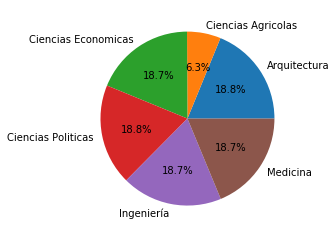

In [17]:
dfConteoExamenes=df.groupby("NombreFacultad").count()["ID_Examen"].reset_index(name="ConteoExamenes")
plt.pie(dfConteoExamenes['ConteoExamenes'],labels=dfConteoExamenes.NombreFacultad,autopct='%1.1f%%')

## 2

<BarContainer object of 16 artists>

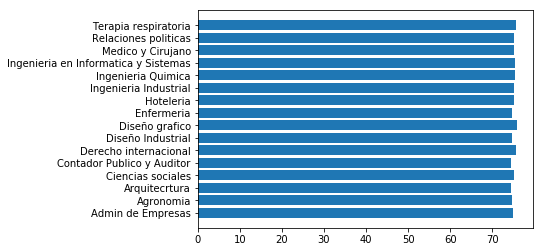

In [21]:
dfPromedioCarrera=df.groupby("NombreCarrera").mean()["NotaTotal"].reset_index(name="Promedio")
plt.barh(dfPromedioCarrera["NombreCarrera"], dfPromedioCarrera["Promedio"])

## 3

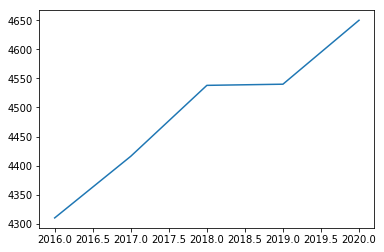

In [24]:
dfPromedioCarrera=df.groupby(["Year"]).count()["ID_Examen"].reset_index(name="Total")
plt.plot(dfPromedioCarrera["Year"], dfPromedioCarrera["Total"])